In [2]:
!conda install -c conda-forge geopy --yes
import pandas as pd
import numpy as np

!conda install -c conda-forge folium=0.5.0 --yes
import json # library to handle JSON files

 # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import math

from operator import itemgetter

print('Libraries imported.')



Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::certifi-2019.11.28-py37_0
  - anaconda/win-64::ca-certificates-2020.1.1-0, anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::certifi-2019.11.28-py37_0, defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::openssl-1.1.1d-he774522_4
  - defaults/win-64::ca-certificates-2020.1.1-0, defaults/win-64::certifi-2019.11.28-py37_0, defaults/win-64::openssl-1.1.1d-he774522_4
  - anaconda/win-64::certifi-2019.11.28-py37_0, anaconda/win-64::openssl-1.1.1d-he774522_4, defaults/win-64::ca-certificates-2020.1.1-0
  - anaconda

# Project of a new business in Oxford

#### As is described in the assignment's description, you will find, in the first instance, the problem described followed by a discussion of the background and the preparation of the data that has been used for the analysis.


## 1. Introduction / Business Understanding

#### The city of Oxford is well known around the entire world because of its University, which is considered by a vast amount of people as one of the most prestigious universities in the world. This fact makes this city famous despite being just populated by a total of 150.000 people, including the thousands of students who every year fight to have the opportunity to be enrolled in such prestigious colleges.

####  Also, it’s because of that reputation the reason why a lot of researchers, scientists and teachers live around Oxfordshire, which produces at the same time, an attraction for a determined type of business related to a certain high-profile customer, as we are talking about one of the top areas in the United Kingdom in the rate composed by income per capita/population.


#### It would be a fundamental part of the study to decide what type of business is more convenient, depending on the analysis of the current situation of how the businesses in the city are structured bearing on mind relevant and pertinent variables.

## 2. Data Requirements

#### In order to successfully complete the study we have used the following data:

#### To extract the different neighborhoods of the city of Oxford we have used Wikipedia.
#### Data source: 'https://en.wikipedia.org/wiki/OX_postcode_area'

#### To obtain the different types of businnesses in Oxford and their location we have used Foursquare API.

#### Alternatively, to support and help us with our decisions, alonsgside the study we will use different types of documents or graphs. The origin of which will be defined accordingly.

## 3. Methodology

#### I have used Github as a repository to follow my studies. Thanks to my research on Wikipedia, I have been able to find the following table which helped me to determine the number of different areas or neighbourhoods which composes the city of Oxford:



In [12]:
# Extracting information from Wikipedia

url= 'https://en.wikipedia.org/wiki/OX_postcode_area'
#column_names= ['Postcode', 'Town', 'Coverage', 'Local authority']
df= pd.read_html(url)
ox= pd.DataFrame(df[1])

# Dropping the 'Local authority area' as we don't need it
ox.drop(columns=['Local authority area'])

,Postcode district,Post town,Coverage
0,OX1,OXFORD,"Central and South Oxford, Kennington, Boars Hi..."
1,OX2,OXFORD,"North and West Oxford, Botley, North Hinksey, ..."
2,OX3,OXFORD,"North East Oxford, Beckley, Headington, Marsto..."
3,OX4,OXFORD,"East Oxford, Cowley, Blackbird Leys, Littlemor..."
4,OX5,KIDLINGTON,"Kidlington, Yarnton, Begbroke, Tackley, Murcot..."
5,OX7,CHIPPING NORTON,"Chipping Norton, Charlbury, Chadlington, Bledi..."
6,OX9,THAME,"Thame, Postcombe, Towersey, North Weston"
7,OX10,WALLINGFORD,"Wallingford, Berinsfield, Cholsey, Dorchester"
8,OX11,DIDCOT,"Didcot, Blewbury, Harwell, Chilton, Aston Tirr..."
9,OX12,WANTAGE,"Wantage, Grove, Ardington, Charney Bassett, Ch..."


#### In the study, I have put focus just on the first four options, the representative ones of the city of Oxford, avoiding towns nearby. After that, I created an excel file composed of each neighbourhood and its coordinates. I have used GeoPy and Python Folium Library to obtain them and visualize them in the following map, respectively.



In [13]:
address = 'Oxford'

geolocator = Nominatim(user_agent="oxford_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Oxford are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Oxford are 51.7520131, -1.2578499.


In [14]:
# Excel file that we have created which includes the final table of coordinates

url2= 'https://raw.githubusercontent.com/rubenmoray/Coursera_Capstone/master/PostcodesOxford'
coor= pd.read_csv(url2)

coor

,Neighborhood,Latitude,Longitude
0,Central Oxford,51.751973,-1.257346
1,Kennington,51.714545,-1.244724
2,Boars Hill,51.716059,-1.291017
3,New Hinksey,51.737846,-1.254995
4,South Hinksey,51.733433,-1.263338
5,Osney,51.750371,-1.276282
6,Botley,51.750819,-1.297849
7,Nirth Hinksey,51.745479,-1.284577
8,Summertown,51.777478,-1.264910
9,Wytham,51.774818,-1.311601


In [44]:
# Creating a map of Oxford using latitude and longitude values
map_oxford = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for neighborhood, lat, lng in zip(coor['Neighborhood'], coor['Latitude'], coor['Longitude']):
    label = '{}'.format(neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_oxford)  
    
map_oxford

#### Foursquare API is essential in my study as it allows me to have a bigger picture of the different type of businesses that are already established in Oxford. To obtain the venues,  I decided to set a limit of  100 venues per neighbourhood in a radius of 500 metres. I fixed the code in a way that every venue belonged to just one neighbourhood as a substantial amount of them are relatively close to each other.

In [16]:
# Putting credentials of Foursquare API

CLIENT_ID = 'IDTBQVONYKQEOLBIQUZRE0WKHTOM3HBM4GA5H1DCYEGFT45P' # your Foursquare ID
CLIENT_SECRET = 'PETVFB1XXDTU4ANJDZSSTQVKQN1GKUD4VRUDL2WLXTWNQDCG' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: CLIENT_SECRET:

In [17]:
neighborhood_latitude = coor['Latitude'][0]
neighborhood_longitude= coor['Longitude'][0]

In [18]:
#Creating the URL

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=IDTBQVONYKQEOLBIQUZRE0WKHTOM3HBM4GA5H1DCYEGFT45P&client_secret=PETVFB1XXDTU4ANJDZSSTQVKQN1GKUD4VRUDL2WLXTWNQDCG&v=20180605&ll=51.751973,-1.2573459999999999&radius=500&limit=100'

In [19]:
# Getting the json file
results = requests.get(url).json()

In [20]:
# Function that extracts the category of the venue

def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
    
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [21]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

C:\Users\ruben\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Ben's Cookies,Dessert Shop,51.752419,-1.256478
1,The Bear Inn,Pub,51.751578,-1.255764
2,Society Cafe,Coffee Shop,51.753504,-1.259350
3,Paul,Bakery,51.752091,-1.257252
4,George & Danver,Ice Cream Shop,51.750517,-1.256960


In [22]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [23]:
## Creating a function to repeat the same process to all the neighborhoods in Oxford

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
            print(name)
            
                # create the API request URL
            url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                LIMIT)

            # make the GET request
            results = requests.get(url).json()["response"]['groups'][0]['items']

            # return only relevant information for each nearby venue
            venues_list.append([(
                name, 
                lat, 
                lng, 
                v['venue']['name'], 
                v['venue']['location']['lat'], 
                v['venue']['location']['lng'],  
                v['venue']['categories'][0]['name']) for v in results])   

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                      'Neighborhood Latitude', 
                      'Neighborhood Longitude', 
                      'Venue', 
                      'Venue Latitude', 
                      'Venue Longitude', 
                      'Venue Category']
    
    return(nearby_venues)

In [24]:
CO_venues= getNearbyVenues(names=coor['Neighborhood'],
                                   latitudes=coor['Latitude'],
                                   longitudes=coor['Longitude']
                                  )

Central Oxford
Kennington
Boars Hill
New Hinksey
South Hinksey
Osney
Botley
Nirth Hinksey
Summertown
Wytham
Jericho
Wolvercote
Beckley
Headington
Marston
Elsfield
Woodeaton
Woodperry
Cowley Centre
Cowley Road
Blackbird Leys
Littlemore Sandford-on-Thames
Iffley
Rose Hill
Wheatley
Forest Hill
Holton
Horspath
Horton-cum-Studley
Littleworth


#### In summary, Foursquare provided me with a table composed of 300 venues, every one of them linked to its neighbourhood and with its respective name, latitude, longitude and category. Here we have the first five venues as a small representation of the whole table:




In [26]:
# Loop DF and calculate distances to the Neighborhood
distances = {}
for index, row in CO_venues.iterrows():
    n = row['Neighborhood']
    n_lat = row['Neighborhood Latitude']
    n_lon = row['Neighborhood Longitude']
    v = row['Venue']
    v_lat = row['Venue Latitude']
    v_lon = row['Venue Longitude']
    v_category = row['Venue Category']
    if v not in distances.keys():
        distances[v] = []
    
    # Calculate distances
    a = [n_lat, n_lon]
    b = [v_lat, v_lon]
    dist = math.sqrt(math.pow((a[0]-b[0]),2)+math.pow((a[1]-b[1]),2))
    distances[v].append([dist, v, [v_lat, v_lon],v_category, n,[n_lat, n_lon]])
    distances[v] = sorted(distances[v], key=itemgetter(0))

result_data = []
for d in distances.keys():
    element = distances[d][0]
    result_data.append([element[4], element[5][0], element[5][1], element[1], element[2][0], element[2][1], element[3]])


#Checking the resulting dataframe
result_data = np.array(result_data)
column_names_result = ['Neighborhood','Neighborhood Latitude','Neighborhood Longitude','Venue','Venue Latitude','Venue Longitude','Venue Category']
df_distances = pd.DataFrame(result_data, columns=column_names_result)
df_distances

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Central Oxford,51.751973,-1.2573459999999999,Ben's Cookies,51.75241853068597,-1.2564784100690305,Dessert Shop
1,Central Oxford,51.751973,-1.2573459999999999,The Bear Inn,51.7515778,-1.2557638,Pub
2,Central Oxford,51.751973,-1.2573459999999999,Society Cafe,51.753503554035994,-1.2593498352524253,Coffee Shop
3,Central Oxford,51.751973,-1.2573459999999999,Paul,51.75209076507254,-1.2572516897365595,Bakery
4,Central Oxford,51.751973,-1.2573459999999999,George & Danver,51.75051738093818,-1.2569597006992463,Ice Cream Shop
...,...,...,...,...,...,...,...
292,Horspath,51.7384274,-1.1744386,The Shotover Brewing Company,51.740598,-1.175138,Brewery
293,Horspath,51.7384274,-1.1744386,Sheps Cycle Shack,51.7376891,-1.168259,Motorcycle Shop
294,Horspath,51.7384274,-1.1744386,ARB UK - Tree Surgeons Oxford,51.73918024,-1.16741507,Home Service
295,Littleworth,51.745,-1.1520000000000001,The Cricketers Arms,51.74457557874883,-1.1515209003398805,Pub


#### From this table, we can observe the following points:

#### Just 'Central Oxford' reached the limit of 100 venues per neighbourhood, which can be a sign of an overcrowded and congested area to set our business.
#### I obtained a number of 113 unique venue categories (e.g. Pub, Bakery, Coffee Shop, etc.)

#### To have an approximation of the business structure of each neighbourhood, I created a list of the top 10 venues for each of them. We have 25 different neighbourhoods so I will separate the table in three different images which will allow us to visualize it better.

In [27]:
#Checking the number of venues per neighborhood
CO_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Beckley,1,1,1,1,1,1
Blackbird Leys,6,6,6,6,6,6
Botley,9,9,9,9,9,9
Central Oxford,100,100,100,100,100,100
Cowley Centre,19,19,19,19,19,19
Cowley Road,50,50,50,50,50,50
Forest Hill,1,1,1,1,1,1
Headington,27,27,27,27,27,27
Holton,4,4,4,4,4,4


In [28]:
#Finding out how many unique categories can be curated from all the returned venue
print('There are {} uniques categories.'.format(len(CO_venues['Venue Category'].unique())))

There are 109 uniques categories.


In [29]:
## Analysing each neighborhood
# one hot encoding
CO_onehot = pd.get_dummies(df_distances[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
CO_onehot['Neighborhood'] = df_distances['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [CO_onehot.columns[-1]] + list(CO_onehot.columns[:-1])
CO_onehot = CO_onehot[fixed_columns]

CO_onehot.head()

,Neighborhood,Art Gallery,Asian Restaurant,Bakery,Bar,Beer Bar,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,...,Sushi Restaurant,Tapas Restaurant,Tennis Court,Thai Restaurant,Theater,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar
0,Central Oxford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Central Oxford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Central Oxford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Central Oxford,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Central Oxford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
CO_onehot.shape

(297, 110)

In [31]:
# Grouping rows by neighborhood and by taking the mean of the frequency of occurrence of each categor
CO_grouped= CO_onehot.groupby('Neighborhood').mean().reset_index()
CO_grouped

,Neighborhood,Art Gallery,Asian Restaurant,Bakery,Bar,Beer Bar,Bookstore,Brazilian Restaurant,Breakfast Spot,Brewery,...,Sushi Restaurant,Tapas Restaurant,Tennis Court,Thai Restaurant,Theater,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar
0,Beckley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Blackbird Leys,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,Botley,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.125,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,Central Oxford,0.032258,0.000000,0.010753,0.021505,0.000000,0.032258,0.010753,0.010753,0.000,...,0.010753,0.000000,0.010753,0.032258,0.010753,0.000000,0.000000,0.000000,0.010753,0.000000
4,Cowley Centre,0.000000,0.000000,0.000000,0.000000,0.000000,0.071429,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Cowley Road,0.000000,0.040816,0.000000,0.040816,0.020408,0.000000,0.000000,0.000000,0.000,...,0.020408,0.020408,0.000000,0.020408,0.000000,0.000000,0.040816,0.000000,0.000000,0.000000
6,Forest Hill,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Headington,0.000000,0.000000,0.045455,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,Holton,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Horspath,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [32]:
# Confirming the new size
CO_grouped.shape

(25, 110)

In [33]:
num_top_venues = 5

for hood in CO_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = CO_grouped[CO_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Beckley----
           venue  freq
0      Gastropub   1.0
1    Art Gallery   0.0
2  Movie Theater   0.0
3          Plaza   0.0
4     Playground   0.0


----Blackbird Leys----
               venue  freq
0           Bus Stop  0.17
1                Pub  0.17
2  Convenience Store  0.17
3               Pool  0.17
4         Playground  0.17


----Botley----
                        venue  freq
0               Deli / Bodega  0.12
1                     Brewery  0.12
2        Fast Food Restaurant  0.12
3  Construction & Landscaping  0.12
4               Shopping Mall  0.12


----Central Oxford----
            venue  freq
0            Café  0.09
1     Coffee Shop  0.06
2             Pub  0.05
3  Clothing Store  0.04
4     Art Gallery  0.03


----Cowley Centre----
                    venue  freq
0          Clothing Store  0.14
1  Furniture / Home Store  0.14
2      Chinese Restaurant  0.07
3       Indian Restaurant  0.07
4          Discount Store  0.07


----Cowley Road----
            venue  

In [34]:
# Putting that into a pandas dataframe

# Writting a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [35]:
# Creating the new dataframe and display the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = CO_grouped['Neighborhood']

for ind in np.arange(CO_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(CO_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Beckley,Gastropub,Wine Bar,French Restaurant,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Eastern European Restaurant,English Restaurant,Farmers Market
1,Blackbird Leys,Pool,Convenience Store,Pub,Music Venue,Bus Stop,Playground,Greek Restaurant,Farmers Market,Coworking Space,History Museum
2,Botley,Construction & Landscaping,Shopping Mall,Deli / Bodega,Pub,Grocery Store,Brewery,Fast Food Restaurant,Sporting Goods Shop,Department Store,Dessert Shop
3,Central Oxford,Café,Coffee Shop,Pub,Clothing Store,Thai Restaurant,Restaurant,Art Gallery,Bookstore,Cocktail Bar,Sandwich Place
4,Cowley Centre,Furniture / Home Store,Clothing Store,Sandwich Place,Shopping Mall,Gym / Fitness Center,Gym,Indian Restaurant,Bookstore,Discount Store,Supermarket
5,Cowley Road,Pub,Cocktail Bar,Pizza Place,Sandwich Place,Ice Cream Shop,Burger Joint,Bar,Asian Restaurant,Turkish Restaurant,Thai Restaurant
6,Forest Hill,Pub,Wine Bar,Convenience Store,Deli / Bodega,Department Store,Dessert Shop,Discount Store,Eastern European Restaurant,English Restaurant,Farmers Market
7,Headington,Pub,Grocery Store,Supermarket,Chinese Restaurant,Coffee Shop,Café,Deli / Bodega,Food Truck,Fast Food Restaurant,Bus Stop
8,Holton,Convenience Store,Gym,Construction & Landscaping,Bus Station,History Museum,Gym / Fitness Center,Hookah Bar,Department Store,Dessert Shop,Discount Store
9,Horspath,Motorcycle Shop,Home Service,Pub,Brewery,Wine Bar,Department Store,Dessert Shop,Discount Store,Eastern European Restaurant,English Restaurant


#### As we can observe in the last table, there is a large variety of business types around the whole city of Oxford, e.g. pubs, coffee shops and restaurants of all nationalities, wine shops, home stores, hotels, department stores or gyms.

## 4. Results

#### Bearing in mind the large amount of information that we hold, we needed to select an area where we can establish our business where it is more likely to succeed. To achieve that, I will start putting focus on the profile of our customer. As I mentioned in the Introduction, their main characteristic will be based in a high-profile customer with high rent, to take advantage of the fact that Oxford is one of the top areas in the United Kingdom in the rate composed by income per capita/population. 

#### Thanks to the website doogal.co.uk, I could create a table composed of a number of wards in Oxford, using the postcode, and its average income, that I have used to do the following histogram, where we can observe the average income in the city grouped by wards. 

In [36]:
# Creating the dataframe
url_postcodes= 'https://raw.githubusercontent.com/rubenmoray/Coursera_Capstone/master/StatsPerPostcode'
df_postcodes= pd.read_csv(url_postcodes)
price= pd.DataFrame(df_postcodes)
df_postcodes

,Postcode,Latitude,Longitude,Ward,Average Income
0,OX1 1AA,51.750231,-1.267367,Carfax,36100
1,OX1 1AB,51.751023,-1.258836,Carfax,36100
2,OX1 1AD,51.758377,-1.273059,Jericho and Osney,58500
3,OX1 1AE,51.758644,-1.272707,Jericho and Osney,58500
4,OX1 1AF,51.758719,-1.273112,Jericho and Osney,58500
...,...,...,...,...,...
4132,OX4 9LZ,51.722617,-1.213389,Littlemore,45900
4133,OX4 9NA,51.722617,-1.213389,Littlemore,45900
4134,OX4 9NF,51.722617,-1.213389,Littlemore,45900
4135,OX4 9NG,51.722617,-1.213389,Littlemore,45900


In [37]:
# Let's group the list by wards
df_postcodes_grouped = df_postcodes.groupby('Ward').mean()
df_postcodes_grouped_by_income = df_postcodes_grouped['Average Income']

# Let's sort the list putting the places with the highest income at the first place
df_postcodes_grouped.sort_values('Average Income', ascending=False).reset_index()

,Ward,Latitude,Longitude,Average Income
0,St Margaret's,51.771281,-1.264622,68400.000000
1,Cumnor,51.743050,-1.319702,66500.000000
2,Summertown,51.782012,-1.266196,61800.000000
3,Wolvercote,51.787725,-1.277002,61600.000000
4,Jericho and Osney,51.754608,-1.273226,58500.000000
5,Headington,51.759457,-1.214026,58400.000000
6,Kennington & Radley,51.715198,-1.247088,58236.764706
7,Botley & Sunningwell,51.744483,-1.292218,57875.000000
8,Quarry and Risinghurst,51.759058,-1.196744,57600.000000
9,Launton and Otmoor,51.808152,-1.210767,57200.000000


In [38]:
df_postcodes_grouped['Average Income']

Ward
Barton and Sandhills            47157.241379
Blackbird Leys                  38988.679245
Botley & Sunningwell            57875.000000
Carfax                          36100.000000
Churchill                       40200.000000
Cowley                          49100.000000
Cowley Marsh                    51600.000000
Cumnor                          66500.000000
Forest Hill & Holton            54300.000000
Garsington & Horspath           54300.000000
Headington                      58400.000000
Headington Hill and Northway    54128.455285
Hinksey Park                    54800.000000
Holywell                        36100.000000
Iffley Fields                   54300.000000
Jericho and Osney               58500.000000
Kennington & Radley             58236.764706
Kidlington East                 57200.000000
Launton and Otmoor              57200.000000
Littlemore                      45900.000000
Lye Valley                      51600.000000
Marston                         57000.000000
North

In [39]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df_postcodes_grouped['Average Income'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[3 3 0 5 4 6 8 2 0 2]
[36100. 39330. 42560. 45790. 49020. 52250. 55480. 58710. 61940. 65170.
 68400.]


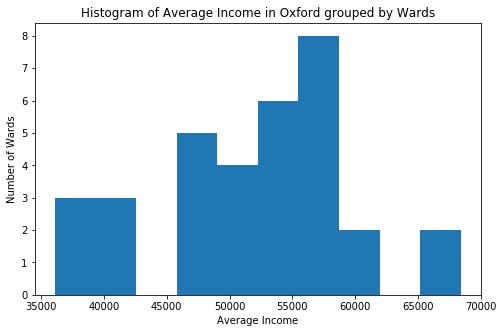

In [40]:
%matplotlib inline
from matplotlib import pyplot as plt
df_postcodes_grouped['Average Income'].plot(kind='hist', figsize=(8, 5))

plt.title('Histogram of Average Income in Oxford grouped by Wards') # add a title to the histogram
plt.ylabel('Number of Wards') # add y-label
plt.xlabel('Average Income') # add x-label

plt.show()

#### Therefore, Summertown, St. Margaret's and Wolvercote would be the three potential options where to establish our business. I don't count Cunmor, as it's a town near the city of Oxford. St. Margaret's, although, is a ward between the north of Jericho and the south of Summertown, so in order to associate it to an actual neighbourhood of the first list of the study, I will associate it with Jericho, which is still the fifth ward in the previous histogram with an average income of £58,500. In the following map, we can visualize the three possible options, each of them highlighted with a red circle.

In [43]:
# Upload image in the report

## 5. Discussion
#### Once we found the three possible areas where to establish our business I decided to analyse the different options we have, based in the top common places that each of those three areas currently have.

#### We can conclude the report with the following observations:

#### The sector of the hospitality is well-covered in each option, as pubs, bars, restaurants, coffee shops are around all the areas.
#### Theatres or department stores would be out of our budget, as they need larger space, so would be much more expensive.
#### A type of delicatessen store of wine would be interesting in Summertown or Jericho, as there is already one Wine Bar which good reputation in Wolvercote, which would be difficult to compete against if we are new in the area.
#### None of the areas have a Furniture / Home Store, which in terms of correlation with the type of our potential client would be the most interesting option.

## 6. Conclusion


#### In conclusion, for a future study, I would broaden my search for data extraction, focusing on a larger city that has more wide-spread variety in venues and information.

#### Users can extract and utilise this information as an orientation to establish what further type of research they will want to carry out.